# Le problème du sac à dos
---
## Énoncé :
On dispose d'un sac à dos qui peut supporter une masse maximale de 15 kg.  
Comment le remplir le plus astucieusement possible avec les objets ci-dessous, en maximisant la valeur totale des objets emportés ?
|   n° objet   |  1  |  2  |  3  |  4  |  5  |  6  |
|:------------:|:---:|:---:|:---:|:---:|:---:|:---:|
|  valeur (€)  |  6  |  4  |  4  |  5  |  5  |  6  |
|  masse (kg)  |  8  |  5  |  4  |  6  |  4  |  5  |


## I) Résolution avec un algorithme glouton


>**Principe :**
>- Trier le tableau par **valeurs** décroissantes
>- Sélectionner les objets dans l'ordre du tri et les ajouter dans le sac si la masse maximale est respectée

1. Exécuter cet algorithme *à la main* : Quels objets sont choisis ? Quelle est leur valeur totale ? Quel est la masse finale du sac à dos ?  
2. Compléter le code ci-dessous pour implémenter cet algorithme en Python :

In [ ]:
objets = [[1,6,8], [2,4,5], [3,4,4], [4,5,6], [5,5,4], [6,6,5]]

def glouton1(objets, masse_maxi):
    objets_choisis = []
    valeur_totale = ...
    masse_totale = ...
    objets_triés = sorted(objets, key=lambda x:x[1], reverse=True)
    for objet in objets_triés:
        if masse_totale + objet[2] <= ...:
            objets_choisis.append(...)
            valeur_totale += ...
            masse_totale += ...
    return objets_choisis, valeur_totale, masse_totale

print(glouton1(objets, 15))

3. Recopier le tableau précédent en ajoutant une ligne **valeurs/masses** et en triant le tableau selon cette nouvelle ligne.<br>Réexécuter l'algorithme glouton *à la main* : Quels objets sont choisis ? Quelle est leur valeur totale ? Quel est la masse finale du sac à dos ?  
4. Compléter le code ci-dessous pour implémenter cette nouvelle version de l'algorithme en Python :

In [ ]:
objets = [[1,6,8], [2,4,5], [3,4,4], [4,5,6], [5,5,4], [6,6,5]]

def glouton2(objets, masse_maxi):
    ...

print(glouton2(objets, 15))

5. Quelle est la meilleure des deux versions de l'algorithme glouton ?
6. Quelle est sa complexité ?
7. Est-on sûr d'avoir trouvé la façon optimale de remplir le sac à dos ? Que se passe-t-il par exemple si on prend les objets 2, 3, 4 et 5 ?

## II) Résolution par force brute

>**Principe :**
>- Identifier toutes les façons de remplir le sac à dos sans tenir compte de la contrainte de masse.
>- Pour chacune de ces façons, déterminer si elle respecte la contrainte de masse et si oui calculer la valeur du sac à dos.
>- Parmi les solutions trouvées, garder la meilleure.

1. On cherche à dénombrer les façons de remplir le sac à dos (sans tenir compte de la contrainte de masse).<br>
Pour chacun des 6 objets, on a deux possibilités : soit on le met dans le sac, soit on ne le met pas.<br>
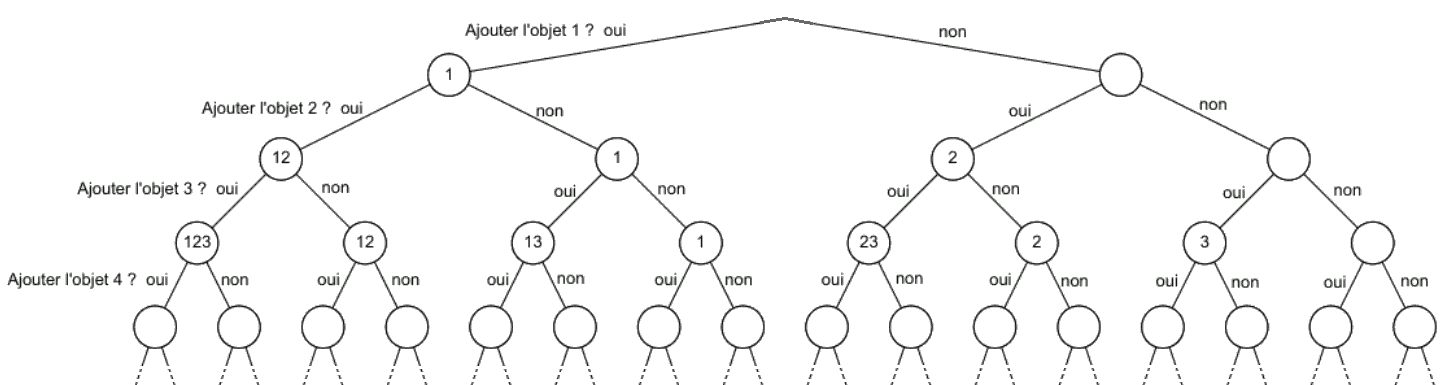<br>
Combien y a-t-il de possibilités en tout ?<br>
Est-ce que cet algorithme est rapide à exécuter *à la main* ?<br>
Quelle est la complexité de cet algorithme ?

2. Dans le code ci-dessous, les objets sont numérotés de 0 à 5 et chaque `combinaison` désigne une des façons possible de remplir le sac à dos. Par exemple la combinaison `011001` désigne le cas où on a mis dans le sac les objets 1, 2 et 5.<br>
Compléter le code ci-dessous pour implémenter cet algorithme en Python :

In [ ]:
objets = [[6,8], [4,5], [4,4], [5,6], [5,4], [6,5]]

def force_brute(objets, masse_maxi):
    solutions = []
    n = ...
    for i in range(2**n):
        combinaison = bin(i)[2:].zfill(n)
        valeur = ...
        masse = ...
        for j in range(n):
            if combinaison[j] == "1":
                valeur += ...
                masse += ...
        if masse <= ...:
            solutions.append([combinaison, valeur, masse])
    solutions = sorted(solutions, key=lambda x:x[1], reverse=True)
    return solutions

print(force_brute(objets, 15))

## III) Résolution par programmation dynamique montante

>**Principe :**
>- A chaque ligne du tableau ci-dessous, on ajoute un nouvel objet et on indique sur le reste de la ligne la valeur maximale que l'on peut atteindre avec cet objet et ceux qui le précèdent, pour chaque masse entre 0kg et 15kg.<br>
Par exemple le **<span style="color:red">10</span>** rouge qui est dans le tableau signifie qu'avec les objets [4€,5kg] et [6€,8kg], et pour un sac de maxi 13kg, la plus grande valeur de sac que l'on peut obtenir est 10€.
>- Plus formellement, si on note respectivement v<sub>i</sub> et m<sub>i</sub> la valeur et la masse du ième objet ainsi que V<sub>i,c</sub> la valeur maximale que l'on peut atteindre avec les i premiers objets pour une masse de c kg, on a alors :
>   - si m<sub>i</sub> > c, alors : V<sub>i,c</sub> = V<sub>i-1,c</sub><br>
>   - si m<sub>i</sub> ≤ c, alors : V<sub>i,c</sub> = max( V<sub>i-1,c</sub>, v<sub>i</sub> + V<sub>i-1,c-m<sub>i</sub></sub> )
> |  objets  | 0kg | 1kg | 2kg | 3kg | 4kg | 5kg | 6kg | 7kg | 8kg | 9kg | 10kg | 11kg | 12kg | 13kg | 14kg | 15kg |
> |:--------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:----:|:----:|:----:|:----:|:----:|:----:|
> |   aucun  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |   0  |   0  |   0  |   0  |   0  |   0  |
> | [6€,8kg] |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  0  |  6  |  6  |   6  |   6  |   6  |   6  |   6  |   6  |
> | [4€,5kg] |  0  |  0  |  0  |  0  |  0  |  4  |  4  |  4  |  6  |  6  |   6  |   6  |   6  |  **<span style="color:red">10</span>**  |  10  |  10  |
> | [4€,4kg] |     |     |     |     |     |     |     |     |     |     |      |      |      |      |      |      |
> | [5€,6kg] |     |     |     |     |     |     |     |     |     |     |      |      |      |      |      |      |
> | [5€,4kg] |     |     |     |     |     |     |     |     |     |     |      |      |      |      |      |      |
> | [6€,5kg] |     |     |     |     |     |     |     |     |     |     |      |      |      |      |      |      |

Regarder la vidéo [https://ladigitale.dev/digiview/#/v/6438ed17a0717](https://ladigitale.dev/digiview/#/v/6438ed17a0717), puis :
1. Recopier et compléter le tableau ci-dessus.
2. Qu'indique la dernière cellule du tableau en bas à droite ?
3. En "remontant" le tableau à partir de cette dernière cellule, retrouver les objets à mettre dans le sac.
4. Compléter le code ci-dessous pour implémenter cet algorithme en Python :

In [ ]:
objets = [[6,8], [4,5], [4,4], [5,6], [5,4], [6,5]]

def tableau_dynamique_montant(objets, masse_maxi):
    n = len(objets)
    tableau = [[0]*(... + 1) for i in range(... + 1)]
    for i in range(n):
        for j in range(...):
            valeur, masse = objets[i]
            if j >= ...:
                ...
            else:
                ...
    return tableau

print(tableau_dynamique_montant(objets, 15))